# Load data for Fig 2E, Fig 3

This data was exported as pandas DataFrame  <br>

In [1]:
import os
import sys
from os.path import join as pjoin

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Fig dir

In [2]:
nn = 512
perc = 15

load_dir = pjoin(
    os.environ['HOME'],
    'Dropbox/git',
    'jb-Ca-fMRI/figs',
    'paper2.0',
    f'n{nn}-p{perc}',
    'DataExport',
)
print(load_dir)

/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/paper2.0/n512-p15/DataExport


In [3]:
os.listdir(load_dir)

['sim.df', 'props.df']

## Load cosine similarity data (Fig 2E)

In [4]:
sim = pd.read_pickle(pjoin(load_dir, 'sim.df'))
sim

,label,oc_idx,subject,score,se
0,BOLD vs. Ca$^{2\!\!+}_{slow}$,1,sub-SLC01,0.889198,NaN
1,BOLD vs. Ca$^{2\!\!+}_{slow}$,1,sub-SLC02,0.796290,NaN
2,BOLD vs. Ca$^{2\!\!+}_{slow}$,1,sub-SLC03,0.836650,NaN
3,BOLD vs. Ca$^{2\!\!+}_{slow}$,1,sub-SLC04,0.807870,NaN
4,BOLD vs. Ca$^{2\!\!+}_{slow}$,1,sub-SLC05,0.888088,NaN
...,...,...,...,...,...
226,Ca$^{2\!\!+}_{slow}$ vs. Ca$^{2\!\!+}_{fast}$,7,sub-SLC07,0.980570,NaN
227,Ca$^{2\!\!+}_{slow}$ vs. Ca$^{2\!\!+}_{fast}$,7,sub-SLC08,0.983453,NaN
228,Ca$^{2\!\!+}_{slow}$ vs. Ca$^{2\!\!+}_{fast}$,7,sub-SLC09,0.941366,NaN
229,Ca$^{2\!\!+}_{slow}$ vs. Ca$^{2\!\!+}_{fast}$,7,sub-SLC10,0.932687,NaN


In [5]:
sim.columns

Index(['label', 'oc_idx', 'subject', 'score', 'se'], dtype='object')

### Explanation of dataframe columns

- **'label'**: has information about conditions compared.
- **'oc_idx'**: community index, there are a total of 7 communities.
- **'subejct'**: There are 10 animals, and one 'group' condition which is just the average over all 10 subejcts.
- **'score'**: cosine similarity score.
- **'se'**: standard error of the mean, computed using bootstrap. Naturally, this number is only defined for 'group'.

In [6]:
sim['subject'].unique()

array(['sub-SLC01', 'sub-SLC02', 'sub-SLC03', 'sub-SLC04', 'sub-SLC05',
       'sub-SLC06', 'sub-SLC07', 'sub-SLC08', 'sub-SLC09', 'sub-SLC10',
       'group'], dtype=object)

### Quick plot showing data

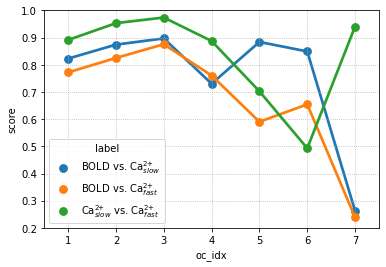

In [7]:
ax = sns.pointplot(
    data=sim.loc[sim['subject'] == 'group'],
    x='oc_idx',
    y='score',
    hue='label',
)
ax.set_ylim(0.2, 1.0)
ax.grid(ls=':')
plt.show()

## Load proportions data (Fig 3)

In [8]:
props = pd.read_pickle(pjoin(load_dir, 'props.df'))
props

,mode,oc_idx,subject,interval,x,y,se
0,BOLD,1,sub-SLC01,"(0.2, 0.4]",0.3,41.492715,NaN
1,BOLD,2,sub-SLC01,"(0.2, 0.4]",0.3,27.663289,NaN
2,BOLD,3,sub-SLC01,"(0.2, 0.4]",0.3,20.770533,NaN
3,BOLD,4,sub-SLC01,"(0.2, 0.4]",0.3,37.657186,NaN
4,BOLD,5,sub-SLC01,"(0.2, 0.4]",0.3,28.191059,NaN
...,...,...,...,...,...,...,...
919,Ca$^{2\!\!+}_{fast}$,3,group,"(0.8, 1.0]",0.9,68.020585,2.249482
920,Ca$^{2\!\!+}_{fast}$,4,group,"(0.8, 1.0]",0.9,29.269927,2.785759
921,Ca$^{2\!\!+}_{fast}$,5,group,"(0.8, 1.0]",0.9,40.959380,2.727941
922,Ca$^{2\!\!+}_{fast}$,6,group,"(0.8, 1.0]",0.9,30.779125,2.452376


In [9]:
props.columns

Index(['mode', 'oc_idx', 'subject', 'interval', 'x', 'y', 'se'], dtype='object')

### Explanation of columns

- **'mode'**: Data modality, a total of 3 options.
- **'oc_idx'**: community index, there are a total of 7 communities.
- **'subejct'**: There are 10 animals, and one 'group' condition which is just the average over all 10 subejcts.
- **'interval'**: Specifies membership bin edges.
- **'x'**: Specifies mid point of each bin.
- **'y'**: Propotion of nodes in a bin.
- **'se'**: standard error of the mean, computed using bootstrap. Naturally, this number is only defined for 'group'.

In [10]:
props['subject'].unique()

array(['sub-SLC01', 'sub-SLC02', 'sub-SLC03', 'sub-SLC04', 'sub-SLC05',
       'sub-SLC06', 'sub-SLC07', 'sub-SLC08', 'sub-SLC09', 'sub-SLC10',
       'group'], dtype=object)